### Doing the MNIST example, but using Tensor Flow

In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.image as mpimg
import numpy as np

In [2]:
print(tf.__version__)

1.13.1


In [3]:
mnist = keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
type(test_images)

numpy.ndarray

([], <a list of 0 Text yticklabel objects>)

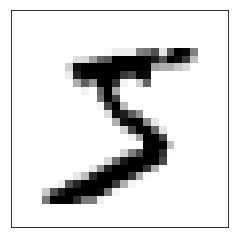

In [7]:
plt.figure()
plt.imshow(train_images[0], cmap = 'binary')
plt.xticks([])
plt.yticks([])

In [8]:
train_images[0].shape

(28, 28)

In [9]:
# Normalizing the data
test_images = test_images/255.0
train_images = train_images/255.0

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Train the model
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0118 - acc: 0.9963
Epoch 2/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0081 - acc: 0.9976
Epoch 3/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0115 - acc: 0.9962
Epoch 4/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0076 - acc: 0.9977
Epoch 5/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0087 - acc: 0.9971
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0091 - acc: 0.9973
Epoch 7/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0058 - acc: 0.9982
Epoch 8/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0091 - acc: 0.9973
Epoch 9/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0091 - acc: 0.9973
Epoch 10/20
60000/60000 [==============================] - 7s 119us/sampl

In [23]:
# Evaluate network performance on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.1647 - acc: 0.9807


In [24]:
test_images.shape

(10000, 28, 28)

### Now to test my own images with the network



     Actual label (Predicted label)


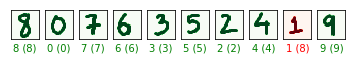

In [25]:
all_images = np.zeros((10, 28, 28))
actual_labels = [8, 0, 7, 6, 3, 5, 2, 4, 1, 9]

filepath = 'my_images'
files = glob.glob(os.path.join(filepath, '*'))
n_examples = len(files)

predicted_labels = ""

for i in range(n_examples):
    img = mpimg.imread(files[i])
    img = np.sum(img, axis=2)/3.
    img = 1-img # So that black pixels are 'hot', and the background is white.
    plt.subplot(1, n_examples, i+1)
    predicted_label = np.argmax(model.predict(img.reshape(1, 28, 28)))
    if(predicted_label == actual_labels[i]):
        plt.imshow(img, cmap = 'Greens')
        color = 'green'
    else:
        plt.imshow(img, cmap = 'Reds')
        color = 'red'
    plt.xlabel(str(actual_labels[i]) + " ("+str(predicted_label)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    
    predicted_labels += str(predicted_label) + " "
    #predicted_labels += str(np.argmax(net.feedforward(img.reshape(784, 1)))) + " "
    #print(model.predict(img))

print("\n\n     Actual label (Predicted label)")

### An example that shows how 'bad' scaling can affect the model prediction
The far left image shows a correctly scaled image, while the second image shows a badly scaled image
The far right image shows the badly scaled image with adjusted colorbar, so that the digit is visible

Text(0.5, 1.0, 'Incorrectly scaled')

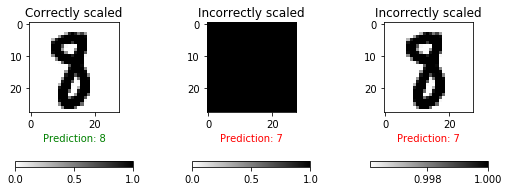

In [26]:
i = 0
img = mpimg.imread(files[i])

img1 = np.sum(img, axis=2)/3. # The right scaling
img2 = (np.sum(img, axis=2)/3.)/255. # The wrong scaling
img1 = 1. - img1
img2 = 1. - img2

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap = 'binary', vmin = 0, vmax = 1)
plt.colorbar(orientation = 'horizontal', shrink=0.8, pad = 0.3)
plt.xlabel("Prediction: "+str(np.argmax(model.predict(img1.reshape(1, 28, 28)))), color = 'green')
plt.title("Correctly scaled")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap = 'binary', vmin = 0, vmax = 1)
plt.colorbar(orientation = 'horizontal', shrink=0.8, pad = 0.3)
plt.xlabel("Prediction: "+str(np.argmax(model.predict(img2.reshape(1, 28, 28)))), color = 'red')
plt.title("Incorrectly scaled")

plt.subplot(1, 3, 3)
plt.imshow(img2, cmap = 'binary')
plt.colorbar(orientation = 'horizontal', shrink=0.8, pad = 0.3)
plt.xlabel("Prediction: "+str(np.argmax(model.predict(img2.reshape(1, 28, 28)))), color = 'red')
plt.title("Incorrectly scaled")


In [28]:
model.save('digit_classifier.h5')

### We conclude this notebook by saving the trained